In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib as plt 
%matplotlib inline
import matplotlib.pyplot as plt


Text(0, 0.5, 'Y DF')

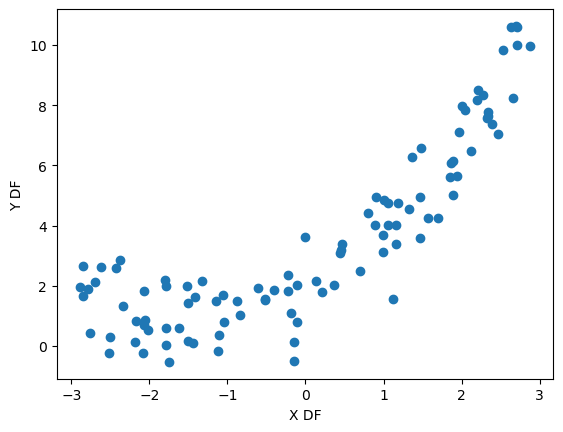

In [6]:
X = 6* np.random.rand(100,1)-3
y = 0.5 * X**2 + 1.5*X + 2 +np.random.randn(100,1)
plt.scatter(X,y)
plt.xlabel('X DF')
plt.ylabel('Y DF')


# X = 6 * np.random.rand(100, 1) - 3
# y = 0.5 * X**2 + 1.5 * X + 2 + np.random.randn(100, 1)  # Corrected equation

# plt.scatter(X, y)
# plt.xlabel('X DF')
# plt.ylabel('Y DF')
# plt.show()

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

In [14]:
#we will try Linear at first
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [18]:
model.fit(X_train,Y_train)

LinearRegression()

In [24]:
from sklearn.metrics import r2_score
score = r2_score(Y_test,model.predict(X_test))
print(score)

0.6268383182016408


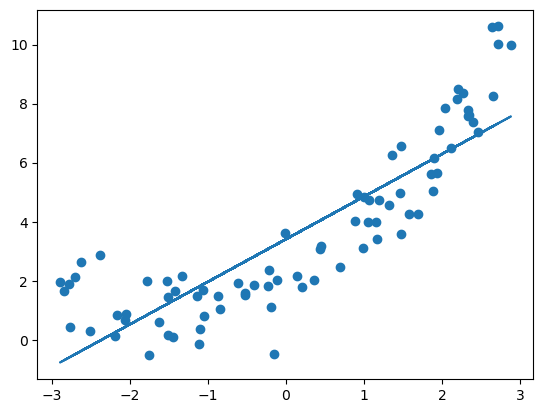

In [28]:
#if we Visualise what is happening
plt.plot(X_train,model.predict(X_train))
plt.scatter(X_train,Y_train)

In [32]:
#so linear is not so good for this We will try the ploynomila regression from now
from sklearn.preprocessing import PolynomialFeatures

In [36]:
poly = PolynomialFeatures(degree = 2,include_bias= True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [38]:
X_train_poly

array([[ 1.00000000e+00,  1.32279476e+00,  1.74978598e+00],
       [ 1.00000000e+00,  1.05665096e+00,  1.11651126e+00],
       [ 1.00000000e+00,  2.33152933e+00,  5.43602900e+00],
       [ 1.00000000e+00, -1.52008088e+00,  2.31064587e+00],
       [ 1.00000000e+00,  2.19211805e+00,  4.80538154e+00],
       [ 1.00000000e+00, -1.32881612e+00,  1.76575227e+00],
       [ 1.00000000e+00, -2.06451285e+00,  4.26221330e+00],
       [ 1.00000000e+00, -1.05707580e+00,  1.11740925e+00],
       [ 1.00000000e+00,  2.04341617e+00,  4.17554966e+00],
       [ 1.00000000e+00,  2.63715440e+00,  6.95458335e+00],
       [ 1.00000000e+00, -5.19386754e-01,  2.69762600e-01],
       [ 1.00000000e+00,  2.33608653e+00,  5.45730026e+00],
       [ 1.00000000e+00, -2.25320237e-01,  5.07692092e-02],
       [ 1.00000000e+00, -1.10432930e+00,  1.21954320e+00],
       [ 1.00000000e+00,  8.90672218e-01,  7.93296999e-01],
       [ 1.00000000e+00, -1.20354938e-02,  1.44853111e-04],
       [ 1.00000000e+00,  1.06323222e+00

In [40]:
X_test_poly

array([[ 1.        , -2.07756194,  4.3162636 ],
       [ 1.        ,  0.47231204,  0.22307866],
       [ 1.        , -0.14196944,  0.02015532],
       [ 1.        , -2.33546682,  5.45440526],
       [ 1.        ,  1.12328366,  1.26176618],
       [ 1.        , -2.52023654,  6.3515922 ],
       [ 1.        , -2.07053506,  4.28711542],
       [ 1.        ,  2.69936776,  7.2865863 ],
       [ 1.        , -1.78730776,  3.19446901],
       [ 1.        , -1.7910451 ,  3.20784256],
       [ 1.        , -1.79546689,  3.22370136],
       [ 1.        , -2.01316696,  4.05284122],
       [ 1.        , -0.10898679,  0.01187812],
       [ 1.        ,  0.99334193,  0.98672819],
       [ 1.        , -2.85161989,  8.13173598],
       [ 1.        ,  1.85926108,  3.45685176],
       [ 1.        , -2.42487851,  5.8800358 ],
       [ 1.        ,  0.8036136 ,  0.64579481],
       [ 1.        ,  2.52638094,  6.38260067],
       [ 1.        ,  2.00628646,  4.02518538]])

In [44]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_poly,Y_train)
Y_pred = model.predict(X_test_poly)
score = r2_score(Y_test,Y_pred)
print(score)

0.8670084894614362


In [46]:
print(model.coef_)

[[0.         1.42360342 0.47383574]]


In [48]:
print(model.intercept_)

[1.99003492]


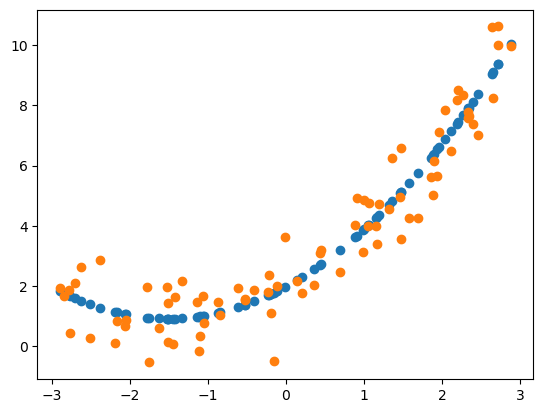

In [50]:
plt.scatter(X_train,model.predict(X_train_poly))
plt.scatter(X_train,Y_train)

In [82]:
#now we try to change the degree and check again
poly = PolynomialFeatures(degree = 12 ,include_bias = True)
X_train_poly= poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [84]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_poly,Y_train)
Y_pred = model.predict(X_test_poly)
score = r2_score(Y_test,Y_pred)
print(score)

0.8735645078015596


In [88]:
#prediction of new data set
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly = poly.transform(X_new)
X_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00, ...,
         5.90490000e+04, -1.77147000e+05,  5.31441000e+05],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00, ...,
         5.33757567e+04, -1.58517951e+05,  4.70774416e+05],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00, ...,
         4.81978756e+04, -1.41687222e+05,  4.16517714e+05],
       ...,
       [ 1.00000000e+00,  2.93969849e+00,  8.64182723e+00, ...,
         4.81978756e+04,  1.41687222e+05,  4.16517714e+05],
       [ 1.00000000e+00,  2.96984925e+00,  8.82000455e+00, ...,
         5.33757567e+04,  1.58517951e+05,  4.70774416e+05],
       [ 1.00000000e+00,  3.00000000e+00,  9.00000000e+00, ...,
         5.90490000e+04,  1.77147000e+05,  5.31441000e+05]])

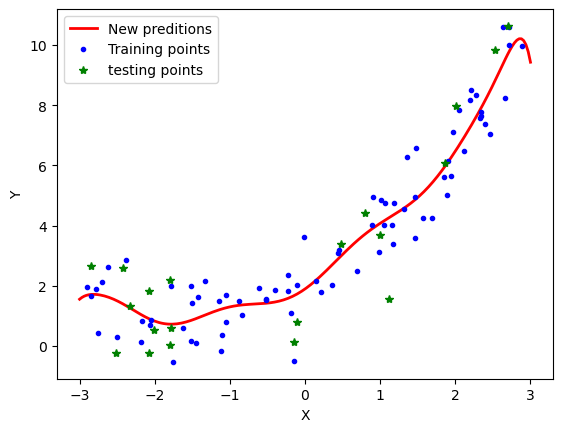

In [100]:
Y_new = model.predict(X_new_poly)
plt.plot(X_new,Y_new,"r-",linewidth=2,label="New preditions")
plt.plot(X_train,Y_train,"b.",label='Training points')
plt.plot(X_test,Y_test,"g*",label='testing points')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()